# Depression Predictor

## Import packages

In [1234]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn import tree
from sklearn.svm import SVC

## Load data

In [1235]:
data = pd.read_csv("b_depressed.csv")

## Take a quick look at the data structure

In [1236]:
data

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


In [1237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [1238]:
data.describe()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,...,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.409000e+03,1429.000000
mean,715.00000,76.286214,0.918125,34.777467,0.772568,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,...,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.360385e+07,0.166550
std,412.66108,66.444012,0.274271,13.986219,0.419320,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,...,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.160228e+07,0.372704
min,1.00000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,358.00000,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,...,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.064203e+07,0.000000
50%,715.00000,57.000000,1.000000,30.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1072.00000,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.151762e+07,0.000000
max,1429.00000,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


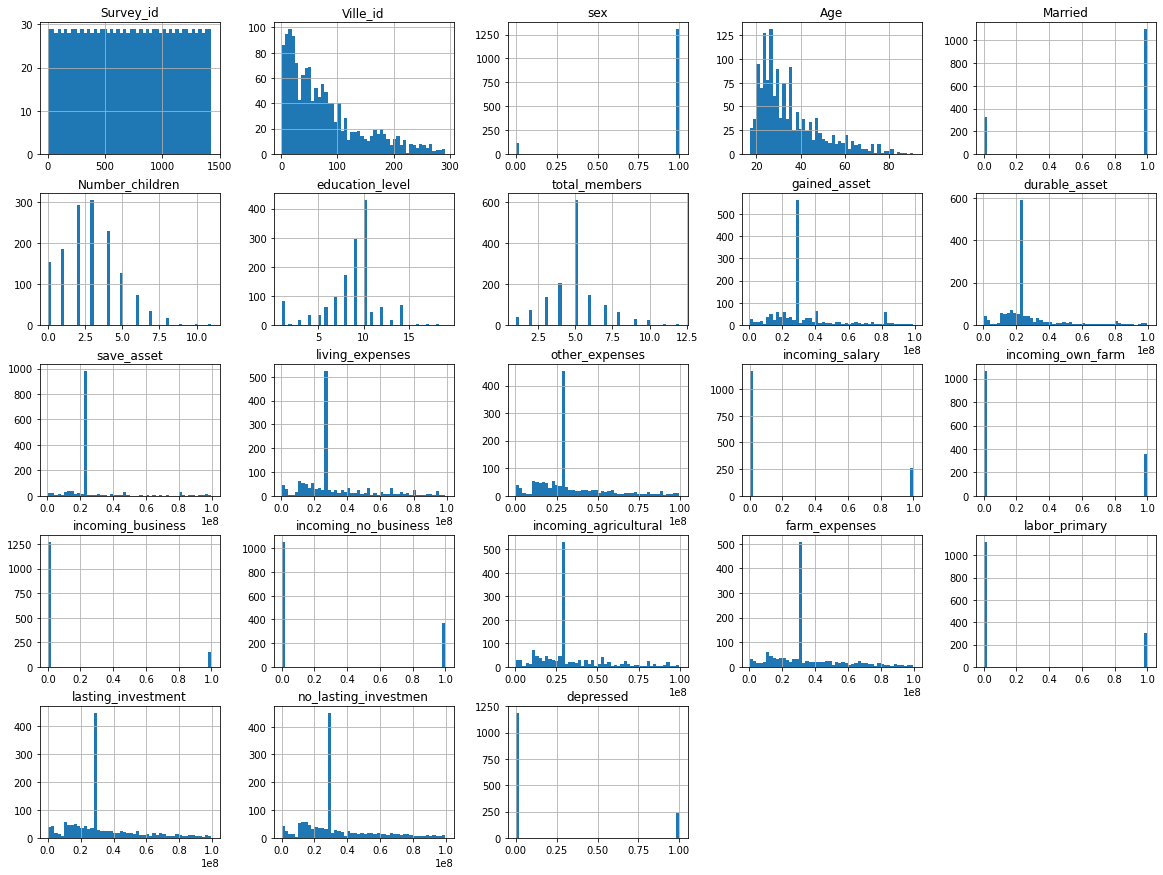

In [1239]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

## Set aside a test set and a validattion set

In [1240]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=8)
print(len(train_set), 'training/validation istances +', len(test_set), 'test instances')

train_set, validation_set = train_test_split(train_set, test_size=0.2, random_state=8)
print(len(train_set), 'training istances +', len(validation_set), 'validation instances')

1143 training/validation istances + 286 test instances
914 training istances + 229 validation instances


## Prepare the data for model training

In [1241]:
attributes = [
    'sex', 'Age', 'Married', 'Number_children', 'education_level', 'total_members',
    'gained_asset','durable_asset','save_asset', 'living_expenses', 'other_expenses',
    'incoming_salary', 'incoming_own_farm', 'incoming_business', 'incoming_no_business', 
    'incoming_agricultural', 'farm_expenses', 'labor_primary', 'lasting_investment', 'no_lasting_investmen',
]

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

pipeline = Pipeline([
    ('selector', DataFrameSelector(attributes)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

train_X = pipeline.fit_transform(train_set)
train_y = np.array(train_set['depressed'])

## Train, select and fine-tune a model

In [1242]:
# Choose and config a model
models = {
    'decision-tree': {
        'max_depth': 10,
        'min_samples_split': 10,
        'min_samples_leaf': 5,
    },
    'svm': {
        'kernel': 'rbf',
        'C': 0.0001,
        'probability': True,
    },
}
model_name = 'svm'

In [1243]:
# Build and fit the model
if model_name == 'decision-tree':
    clf = DecisionTreeClassifier(random_state=0, **models['decision-tree'])
elif model_name == 'svm':
    clf = SVC(random_state=0, **models['svm'])
else:
    raise ValueError('Invalid model specified!')
clf.fit(train_X, train_y)

SVC(C=0.0001, probability=True, random_state=0)

In [1244]:
# Predict on train set
train_X = pipeline.transform(train_set)
pred_y = clf.predict(train_X)
pred_proba = clf.predict_proba(train_X)

Accuracy: 0.8216630196936543
AUC of ROC: 0.7088462826660568


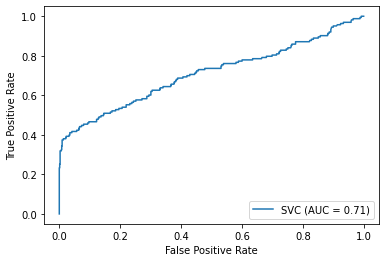

In [1245]:
# Evaluate on train set
print('Accuracy: {}'.format(accuracy_score(train_y, pred_y)))
print('AUC of ROC: {}'.format(roc_auc_score(train_y, pred_proba[:, 1])))
plot_roc_curve(clf, train_X, train_y)

In [1246]:
# Predict on validation set
validation_X = pipeline.transform(validation_set)
validation_y = np.array(validation_set['depressed'])
pred_y = clf.predict(validation_X)
pred_proba = clf.predict_proba(validation_X)

Accuracy: 0.8820960698689956
AUC of ROC: 0.5726072607260726


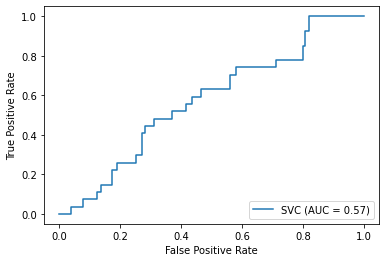

In [1247]:
# Evaluate on validation set
print('Accuracy: {}'.format(accuracy_score(validation_y, pred_y)))
print('AUC of ROC: {}'.format(roc_auc_score(validation_y, pred_proba[:, 1])))
plot_roc_curve(clf, validation_X, validation_y)

In [1248]:
# Obtain tree depth and number of leaves
if model_name == 'decision-tree':
    print(clf.get_depth(), clf.get_n_leaves())

In [1249]:
# Plot decision tree
if model_name == 'decision-tree':
    tree.plot_tree(clf)

## Evaluate the final model on the test set

In [1250]:
# Predict on test set
test_X = pipeline.transform(test_set)
test_y = np.array(test_set['depressed'])
pred_y = clf.predict(test_X)
pred_proba = clf.predict_proba(test_X)

Accuracy: 0.8321678321678322
AUC of ROC: 0.634891456582633


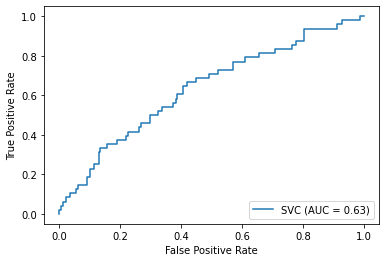

In [1251]:
# Evaluate on test set
print('Accuracy: {}'.format(accuracy_score(test_y, pred_y)))
print('AUC of ROC: {}'.format(roc_auc_score(test_y, pred_proba[:, 1])))
plot_roc_curve(clf, test_X, test_y)